# **Implement a perceptron algorithm to classify a small dataset of points into two categories.**

In [ ]:
import numpy as np

# Define the dataset for the AND operation
# Inputs and the expected outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 0, 0, 1])  # AND logic gate outputs

# Initialize weights and bias
weights = np.random.rand(2)  # Two weights for two input features
bias = np.random.rand(1)     # Single bias term
learning_rate = 0.1          # Learning rate
epochs = 20                  # Number of training iterations

# Activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(epochs):
    for i in range(len(X)):
        # Calculate the weighted sum
        linear_output = np.dot(weights, X[i]) + bias
        # Apply the step function
        y_pred = step_function(linear_output)
        # Calculate the error
        error = y[i] - y_pred
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Print the trained weights and bias
print("Trained weights:", weights)
print("Trained bias:", bias)

# Test the perceptron with the same inputs
print("\nTesting perceptron:")
for i in range(len(X)):
    linear_output = np.dot(weights, X[i]) + bias
    y_pred = step_function(linear_output)
    print(f"Input: {X[i]}, Predicted: {y_pred}, Actual: {y[i]}")

Trained weights: [0.23188862 0.0847835 ]
Trained bias: [-0.27000098]

Testing perceptron:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1


# **Train a simple neural network using backpropagation on a dataset (e.g., MNIST) to recognize digits.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0  # Normalize to [0, 1]
X_test = X_test / 255.0    # Normalize to [0, 1]

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(64, activation='relu'),   # Fully connected layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on test data
predictions = model.predict(X_test[:5])  # Predict on the first 5 test samples
print("Predictions (one-hot encoded):", predictions)
print("Predicted digits:", predictions.argmax(axis=1))
print("Actual digits:", y_test[:5].argmax(axis=1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8588 - loss: 0.4803 - val_accuracy: 0.9598 - val_loss: 0.1333
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9663 - loss: 0.1122 - val_accuracy: 0.9662 - val_loss: 0.1094
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9776 - loss: 0.0757 - val_accuracy: 0.9713 - val_loss: 0.0923
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.9708 - val_loss: 0.0991
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9754 - val_loss: 0.0837
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9895 - loss: 0.0318 - val_accuracy: 0.9715 - val_loss: 0.0990
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9737 - val_loss: 0.1019
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9935 - loss: 0.0225 -

# **Test the performance of a neural network on a dataset by comparing ReLU, Sigmoid, and Tanh activations.**

Training model with relu activation...
Test Accuracy with relu: 97.77%
Training model with sigmoid activation...
Test Accuracy with sigmoid: 97.36%
Training model with tanh activation...
Test Accuracy with tanh: 97.53%


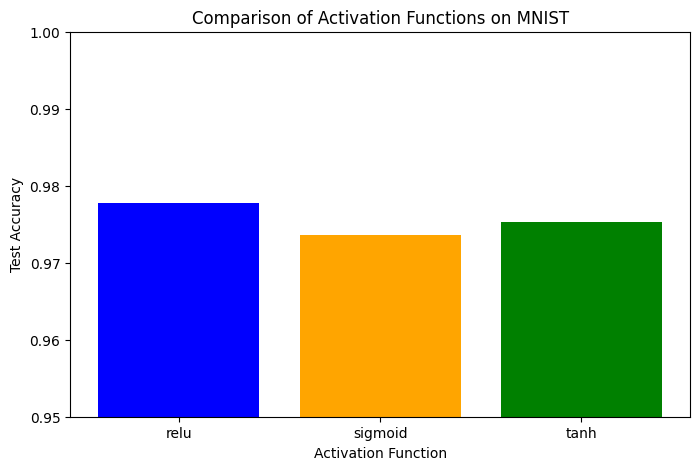

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0  # Normalize to [0, 1]
X_test = X_test / 255.0    # Normalize to [0, 1]
y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Function to create a model with a given activation function
def create_model(activation):
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vectors
        Dense(128, activation=activation),  # Hidden layer 1
        Dense(64, activation=activation),   # Hidden layer 2
        Dense(10, activation='softmax')     # Output layer
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# List of activation functions to test
activations = ['relu', 'sigmoid', 'tanh']
accuracies = []

# Train and evaluate models with different activation functions
for activation in activations:
    print(f"Training model with {activation} activation...")
    model = create_model(activation)
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # Train for 5 epochs
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate on test data
    accuracies.append(accuracy)
    print(f"Test Accuracy with {activation}: {accuracy * 100:.2f}%")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(activations, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Activation Functions on MNIST')
plt.ylim(0.95, 1.0)  # Scale to highlight differences
plt.show()

# **Design and train a CNN model to classify a small dataset of 10 sample images into two categories.**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5208 - loss: 0.7084
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3958 - loss: 0.7566     
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7389 - loss: 0.5918 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7389 - loss: 0.5687 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.4782 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9458 - loss: 0.4270
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.3575 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.2825  
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.2001 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1469 
Test Accuracy: 75.00%


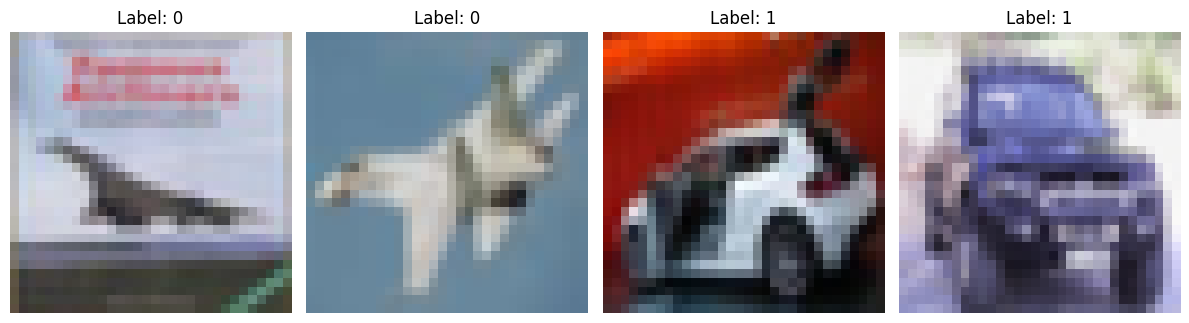

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

# Use the first 5 samples of class 0 (airplane) and class 1 (automobile) for training
class_0_idx = np.where(y_train_full.flatten() == 0)[0][:5]
class_1_idx = np.where(y_train_full.flatten() == 1)[0][:5]
subset_indices = np.concatenate((class_0_idx, class_1_idx))

X_train = X_train_full[subset_indices]
y_train = y_train_full[subset_indices]

# Use 2 samples from each class for testing
class_0_test_idx = np.where(y_test_full.flatten() == 0)[0][:2]
class_1_test_idx = np.where(y_test_full.flatten() == 1)[0][:2]
test_indices = np.concatenate((class_0_test_idx, class_1_test_idx))

X_test = X_test_full[test_indices]
y_test = y_test_full[test_indices]

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to binary class indicators (0 and 1)
y_train = to_categorical((y_train == 1).astype(int), 2)
y_test = to_categorical((y_test == 1).astype(int), 2)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 categories
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display training and testing samples
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axs[i].imshow(X_test[i])
    axs[i].axis('off')
    axs[i].set_title(f"Label: {np.argmax(y_test[i])}")
plt.tight_layout()
plt.show()

# **Develop an LSTM model to predict the next value in a small sequence of numbers (e.g., Fibonacci series)**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Generate a Fibonacci series
def generate_fibonacci(n):
    sequence = [0, 1]
    for i in range(2, n):
        sequence.append(sequence[-1] + sequence[-2])
    return np.array(sequence, dtype=np.float32)

# Prepare the dataset
def create_dataset(sequence, step_size):
    X, y = [], []
    for i in range(len(sequence) - step_size):
        X.append(sequence[i:i + step_size])
        y.append(sequence[i + step_size])
    return np.array(X), np.array(y)

# Generate Fibonacci series
n_terms = 15  # Number of terms in the Fibonacci series
step_size = 3  # Number of previous steps to predict the next
fibonacci_sequence = generate_fibonacci(n_terms)

# Normalize the sequence
scaler = MinMaxScaler()
fibonacci_sequence = scaler.fit_transform(fibonacci_sequence.reshape(-1, 1)).flatten()

# Create the dataset
X, y = create_dataset(fibonacci_sequence, step_size)

# Reshape input for LSTM (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(step_size, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=0)

# Test the model
test_input = fibonacci_sequence[-step_size:]  # Last sequence in the dataset
test_input = test_input.reshape((1, step_size, 1))  # Reshape for LSTM

predicted_value = model.predict(test_input)
predicted_value = scaler.inverse_transform(predicted_value)[0][0]

# Print results
print(f"Last sequence: {scaler.inverse_transform(test_input[0].reshape(-1, 1)).flatten()}")
print(f"Predicted next value: {predicted_value}")

# Validate against the true Fibonacci value
true_next_value = generate_fibonacci(n_terms + 1)[-1]
print(f"True next value: {true_next_value}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Last sequence: [144. 233. 377.]
Predicted next value: 544.8402099609375
True next value: 610.0


# **Compare the training times of a simple neural network on CPU and GPU using a provided dataset**

In [ ]:
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0  # Normalize to [0, 1]
X_test = X_test / 255.0    # Normalize to [0, 1]
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Measure training time on CPU
with tf.device('/CPU:0'):
    model_cpu = create_model()
    start_time = time.time()
    model_cpu.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
    cpu_training_time = time.time() - start_time
    print(f"Training time on CPU: {cpu_training_time:.2f} seconds")

# Measure training time on GPU (if available)
if tf.test.is_gpu_available():
    with tf.device('/GPU:0'):
        model_gpu = create_model()
        start_time = time.time()
        model_gpu.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
        gpu_training_time = time.time() - start_time
        print(f"Training time on GPU: {gpu_training_time:.2f} seconds")
else:
    gpu_training_time = None
    print("GPU not available.")

# Compare the results
if gpu_training_time is not None:
    print(f"GPU was {cpu_training_time / gpu_training_time:.2f} times faster than CPU.")

Training time on CPU: 13.66 seconds
Training time on GPU: 9.32 seconds
GPU was 1.47 times faster than CPU.


# **Create a small dataset and analyze its processing speed using an AI accelerator (TPU) vs CPU.**

In [ ]:
import tensorflow as tf
import numpy as np
import time

# Check TPU availability
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    print("TPU found. Initializing...")
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # Set TPU strategy
except ValueError:
    print("No TPU found. Using default strategy.")
    strategy = tf.distribute.get_strategy()  # Use CPU/GPU

# Generate a small synthetic dataset
def create_dataset(num_samples=1000, input_dim=20, num_classes=2):
    X = np.random.rand(num_samples, input_dim).astype(np.float32)
    y = np.random.randint(0, num_classes, size=(num_samples,))
    y = tf.keras.utils.to_categorical(y, num_classes)  # One-hot encode labels
    return X, y

# Create a small dataset
input_dim = 20
num_classes = 2
X_train, y_train = create_dataset(num_samples=1000, input_dim=input_dim, num_classes=num_classes)

# Define a simple model
def create_model(input_dim, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Measure training time on CPU/GPU
with tf.device('/CPU:0'):
    model_cpu = create_model(input_dim, num_classes)
    start_time = time.time()
    model_cpu.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
    cpu_training_time = time.time() - start_time
    print(f"Training time on CPU: {cpu_training_time:.2f} seconds")

# Measure training time on TPU
with strategy.scope():
    model_tpu = create_model(input_dim, num_classes)
    start_time = time.time()
    model_tpu.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
    tpu_training_time = time.time() - start_time
    print(f"Training time on TPU: {tpu_training_time:.2f} seconds")

# Compare results
if tpu_training_time > 0:
    print(f"TPU was {cpu_training_time / tpu_training_time:.2f} times faster than CPU.")
else:
    print("TPU training time not measurable.")

TPU found. Initializing...
Training time on CPU: 0.70 seconds
Training time on TPU: 4.19 seconds
TPU was 0.17 times faster than CPU.


# **Train a neural network on a synthetic dataset and compare its performance using Adam and SGD optimizers**

Training with adam optimizer...
Accuracy with adam: 49.50%
Training with sgd optimizer...
Accuracy with sgd: 48.00%


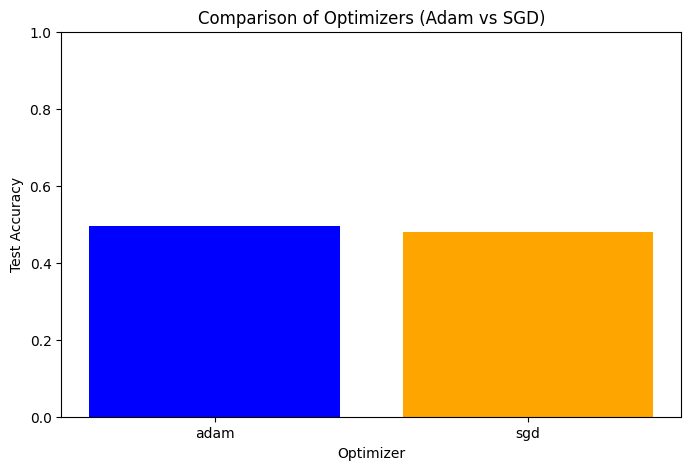

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate a synthetic dataset
def create_dataset(num_samples=1000, input_dim=20, num_classes=2):
    X = np.random.rand(num_samples, input_dim).astype(np.float32)  # Random features
    y = np.random.randint(0, num_classes, size=(num_samples,))     # Random binary labels
    y = tf.keras.utils.to_categorical(y, num_classes)             # One-hot encode labels
    return X, y

# Create dataset
input_dim = 20
num_classes = 2
X_train, y_train = create_dataset(num_samples=1000, input_dim=input_dim, num_classes=num_classes)
X_test, y_test = create_dataset(num_samples=200, input_dim=input_dim, num_classes=num_classes)

# Define a simple neural network model
def create_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Train and evaluate the model with different optimizers
optimizers = ['adam', 'sgd']
accuracy_results = []

for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer...")
    model = create_model(input_dim, num_classes)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Train for 10 epochs
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate on test data
    accuracy_results.append(accuracy)
    print(f"Accuracy with {optimizer}: {accuracy * 100:.2f}%")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(optimizers, accuracy_results, color=['blue', 'orange'])
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Optimizers (Adam vs SGD)')
plt.ylim(0, 1)  # Accuracy scale from 0 to 1
plt.show()

# **Implement a CNN to identify whether an image dataset contains cats or dogs (binary classification).**

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 452ms/step - accuracy: 0.5060 - loss: 0.8752 - val_accuracy: 0.5010 - val_loss: 0.7070
Epoch 2/10
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5625 - loss: 0.6879

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5625 - loss: 0.6879 - val_accuracy: 0.6250 - val_loss: 0.6475
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.5153 - loss: 0.6998 - val_accuracy: 0.6008 - val_loss: 0.6627
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6562 - loss: 0.6333 - val_accuracy: 0.8750 - val_loss: 0.5790
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - accuracy: 0.5901 - loss: 0.6724 - val_accuracy: 0.6018 - val_loss: 0.6713
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5625 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6720
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.6114 - loss: 0.6663 - val_accuracy: 0.5817 - val_loss: 0.6626
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6250 - loss: 0.6625 - val_accuracy: 0.3750 - val_loss: 0.6896
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - accuracy: 0.5734 - loss: 0.6795 - val_accuracy: 0.6603 - val_

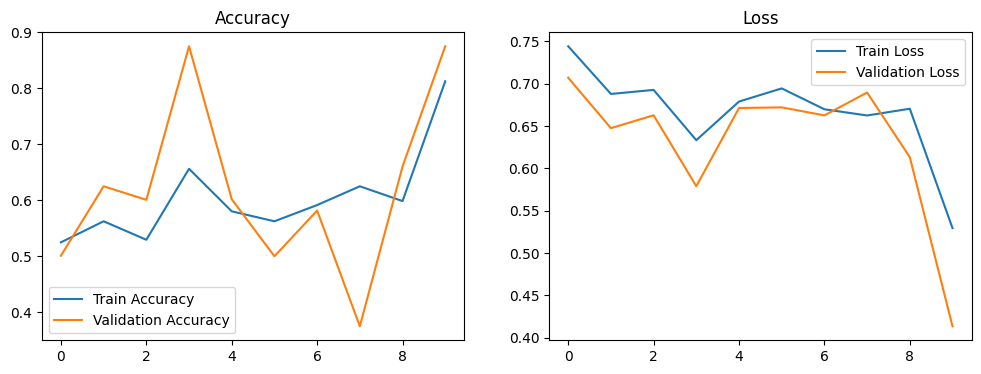

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import shutil
import matplotlib.pyplot as plt

# Download and extract the dataset
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

# Define dataset paths
base_dir = os.path.join(os.path.dirname(dataset_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocess the dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate batches of image data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# **Use LSTM to analyze a short text dataset and predict the next word in a sentence**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Sample text dataset
text_data = """
I love machine learning
Machine learning is amazing
Deep learning is part of AI
AI is the future of technology
Learning makes life interesting
"""

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
word_index = tokenizer.word_index
total_words = len(word_index) + 1

# Create input sequences
input_sequences = []
for line in text_data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Split into inputs (X) and outputs (y)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build the LSTM model
model = Sequential([
    Embedding(total_words, 50, input_length=max_sequence_len-1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=2)

# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted_probs)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

# Test the model
seed_text = "Artificial"
next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
print(f"Seed text: '{seed_text}'")
print(f"Predicted next word: '{next_word}'")

Epoch 1/100
1/1 - 1s - 1s/step - accuracy: 0.0000e+00 - loss: 2.8340
Epoch 2/100
1/1 - 0s - 48ms/step - accuracy: 0.1053 - loss: 2.8274
Epoch 3/100
1/1 - 0s - 21ms/step - accuracy: 0.2105 - loss: 2.8207
Epoch 4/100
1/1 - 0s - 23ms/step - accuracy: 0.1579 - loss: 2.8139
Epoch 5/100
1/1 - 0s - 56ms/step - accuracy: 0.1579 - loss: 2.8067
Epoch 6/100
1/1 - 0s - 20ms/step - accuracy: 0.1579 - loss: 2.7992
Epoch 7/100
1/1 - 0s - 22ms/step - accuracy: 0.1579 - loss: 2.7909
Epoch 8/100
1/1 - 0s - 57ms/step - accuracy: 0.1579 - loss: 2.7819
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.1579 - loss: 2.7720
Epoch 10/100
1/1 - 0s - 21ms/step - accuracy: 0.1579 - loss: 2.7608
Epoch 11/100
1/1 - 0s - 21ms/step - accuracy: 0.1579 - loss: 2.7483
Epoch 12/100
1/1 - 0s - 59ms/step - accuracy: 0.1579 - loss: 2.7341
Epoch 13/100
1/1 - 0s - 57ms/step - accuracy: 0.1579 - loss: 2.7179
Epoch 14/100
1/1 - 0s - 57ms/step - accuracy: 0.1579 - loss: 2.6995
Epoch 15/100
1/1 - 0s - 22ms/step - accuracy: 0.1579 - 